# Modelo de Classificação para diagnóstico de diabetes em mulheres, baseado em Árvores de Decisão

## 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

## 2. Criação do DataFrame, utilizando o dataset selecionado

In [2]:
df = pd.read_csv('diabetes.csv', sep=',')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 3. Análise Exploratória dos Dados

### 3.1. Visualização de informações do df

### 3.2. Utilizando o método .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.3. Conferência de ocorrênca ou ausência de valores nulos

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3.4. Tradução dos nomes das colunas para Português Brasileiro

In [5]:
df = df.rename(columns={'Pregnancies':'num_gravidez',
                       'Glucose':'taxa_glicose',
                       'BloodPressure':'pressao_arterial',
                       'SkinThickness':'espessura_pele',
                       'Insulin':'nivel_insulina',
                       'BMI':'imc',
                       'DiabetesPedigreeFunction':'funcao_hereditariedade_diabetes',
                       'Age':'idade',
                       'Outcome':'resultado'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_gravidez                     768 non-null    int64  
 1   taxa_glicose                     768 non-null    int64  
 2   pressao_arterial                 768 non-null    int64  
 3   espessura_pele                   768 non-null    int64  
 4   nivel_insulina                   768 non-null    int64  
 5   imc                              768 non-null    float64
 6   funcao_hereditariedade_diabetes  768 non-null    float64
 7   idade                            768 non-null    int64  
 8   resultado                        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.5. Descrição Estatística do df, usando o método .describe()

In [7]:
df.describe()

,num_gravidez,taxa_glicose,pressao_arterial,espessura_pele,nivel_insulina,imc,funcao_hereditariedade_diabetes,idade,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# df[df['nivel_insulina'] == 0]

### 3.6 Visualização da descrição estatística, usando histograma de Matplotlib

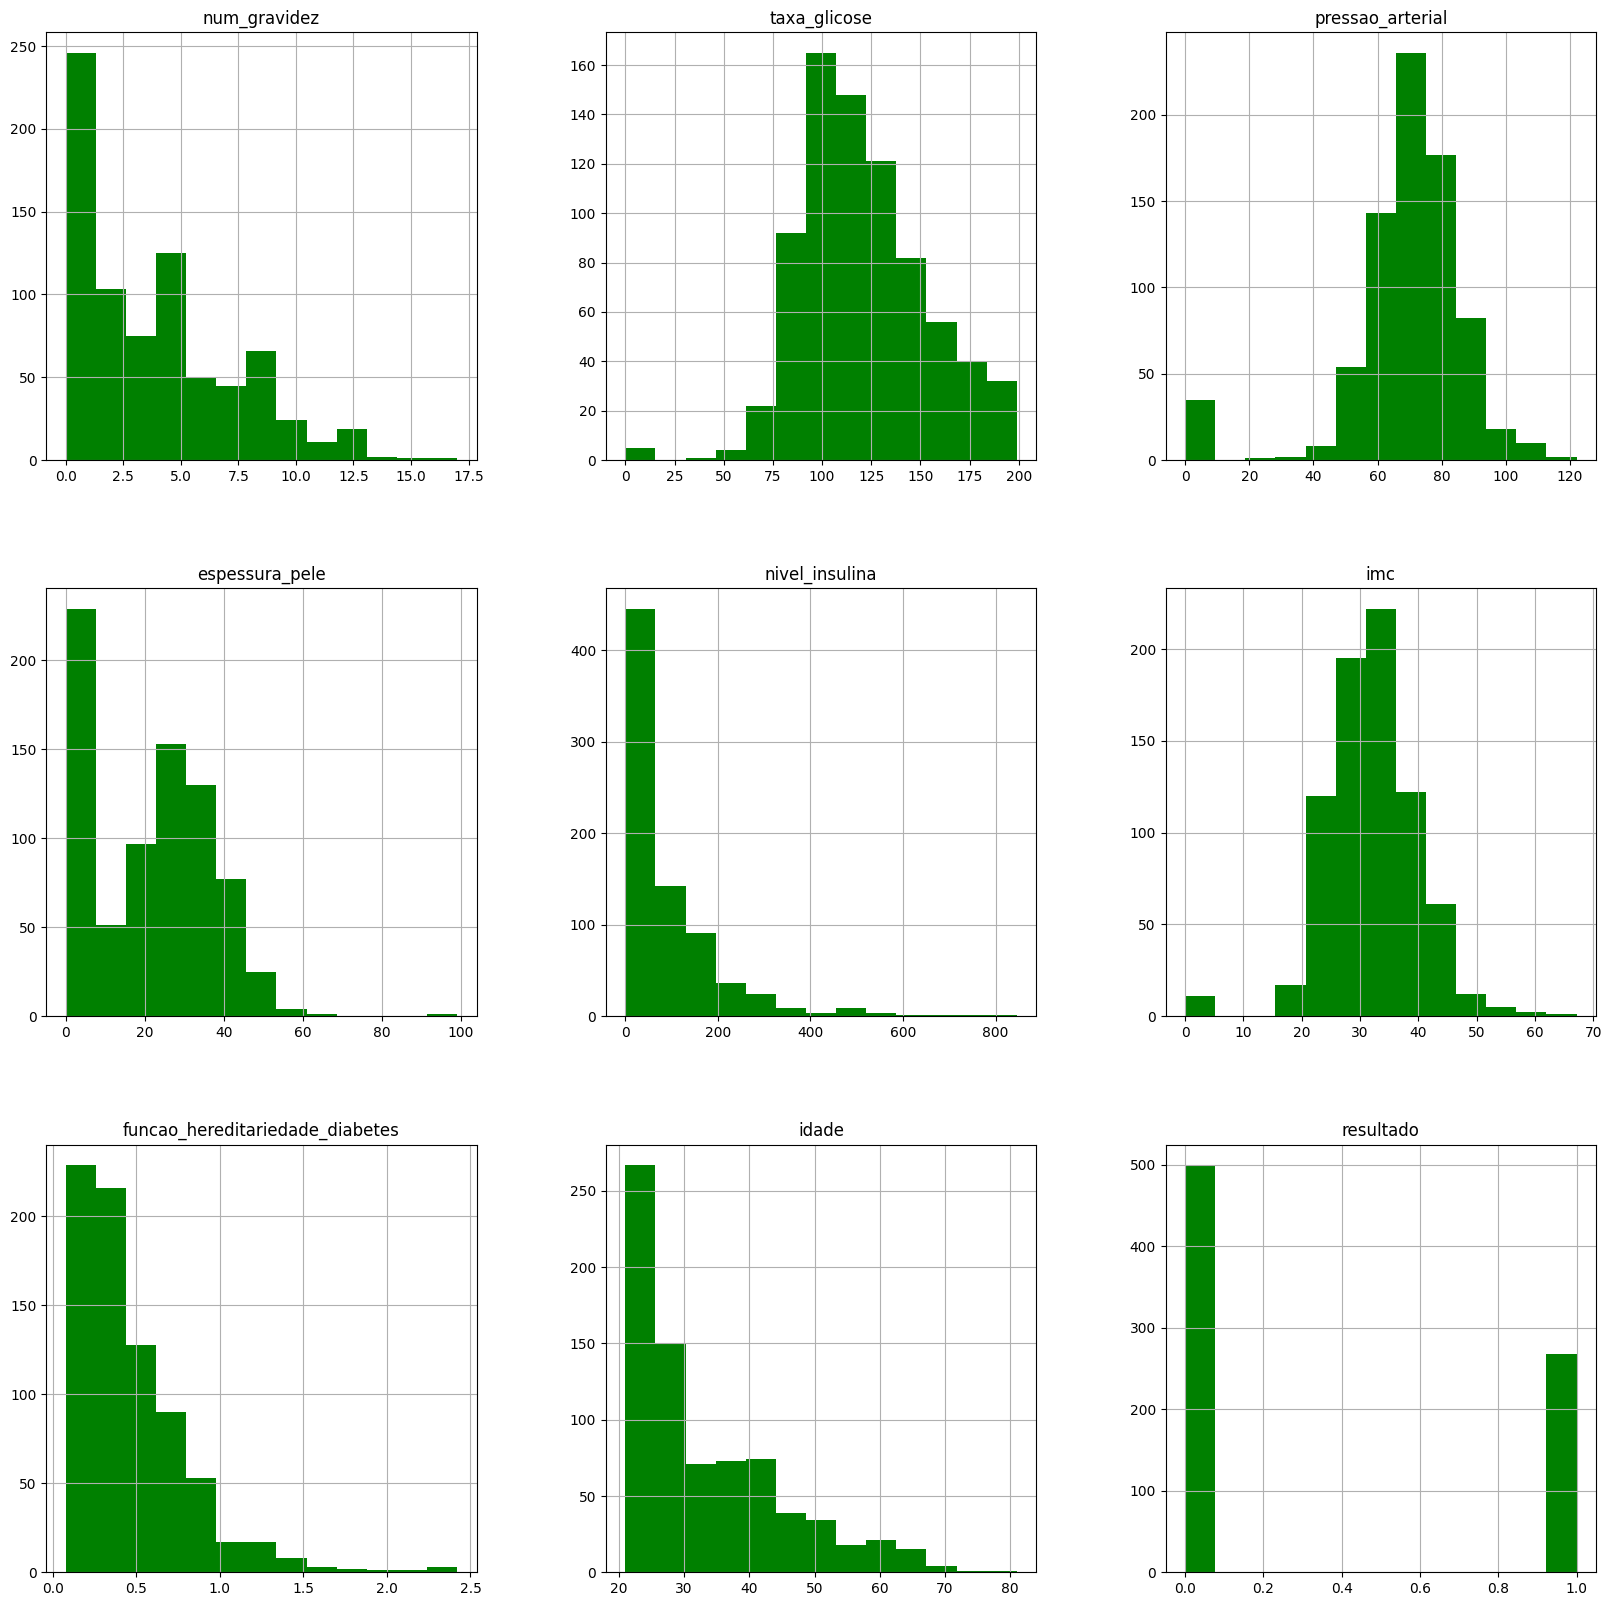

In [9]:
df.hist(bins=13, figsize=(20,20), color='g')
plt.show()

### 3.7 Criação e visualização da Matriz de Correlação

In [10]:
# Criação da Matriz de Correlação
matriz_corr = df.corr()
matriz_corr

,num_gravidez,taxa_glicose,pressao_arterial,espessura_pele,nivel_insulina,imc,funcao_hereditariedade_diabetes,idade,resultado
num_gravidez,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
taxa_glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressao_arterial,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
espessura_pele,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
nivel_insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
imc,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
funcao_hereditariedade_diabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


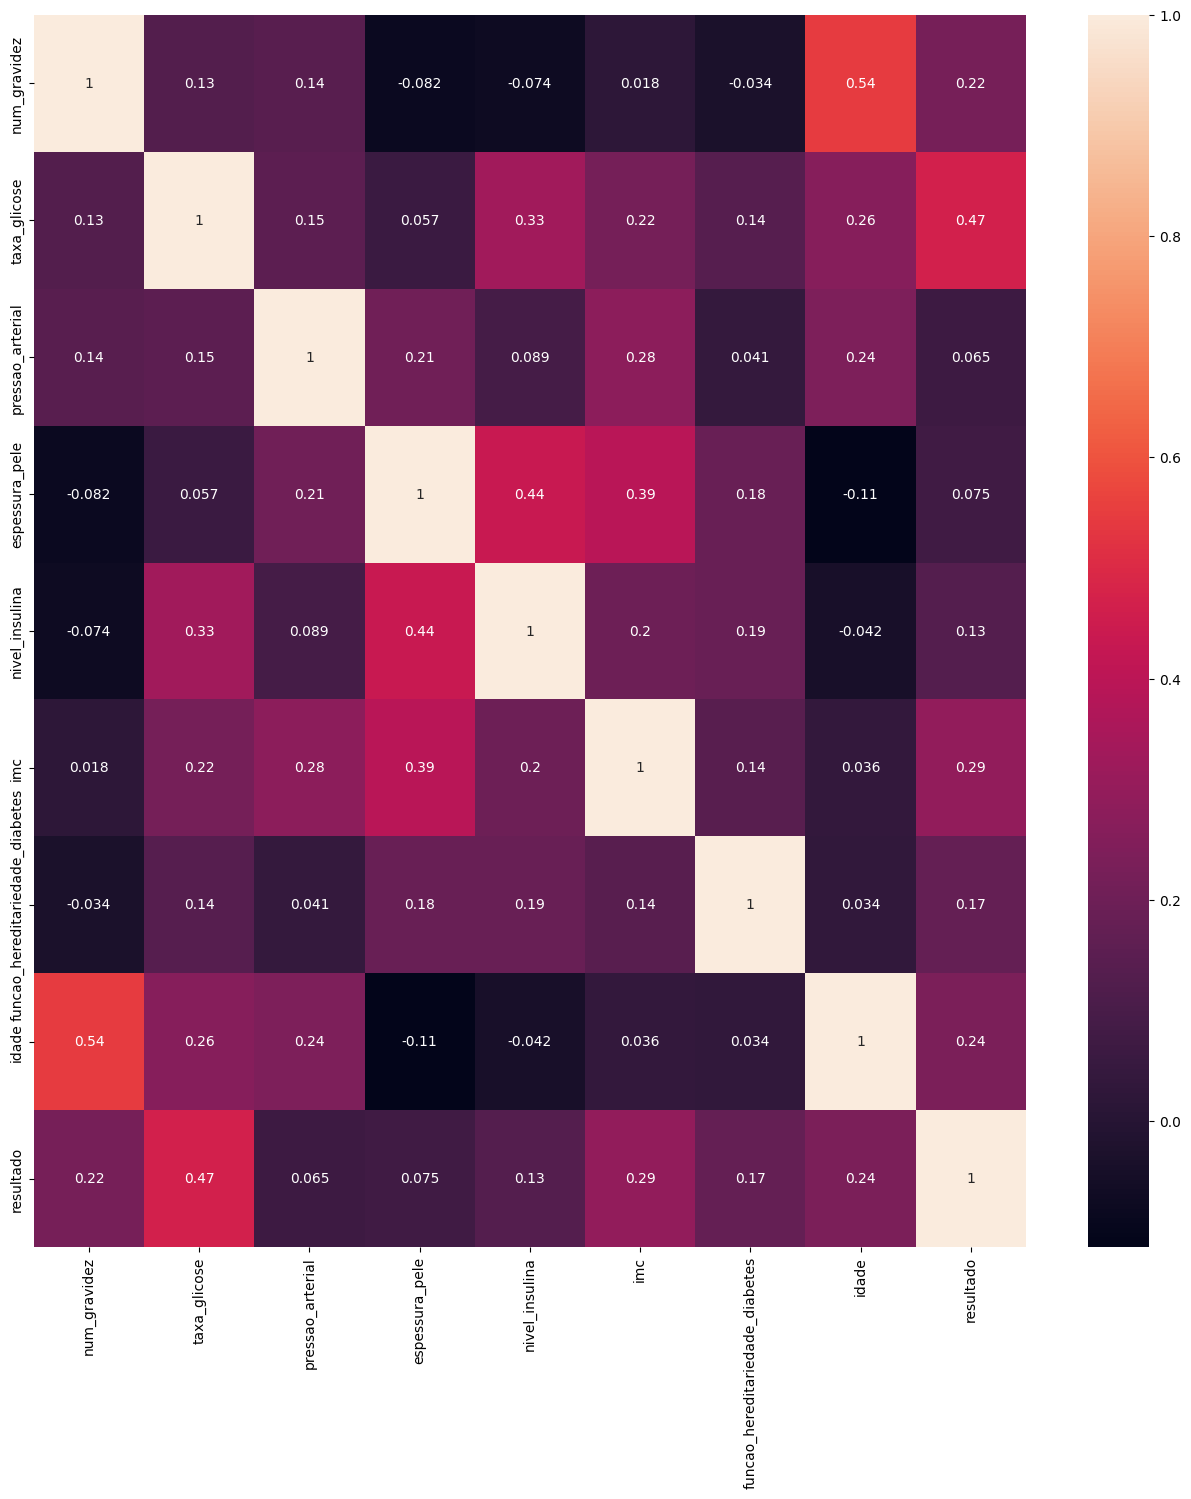

In [11]:
# Visualização da Matriz de Correlação
plt.figure(figsize=(16,16))
sns.heatmap(matriz_corr, annot=True)
plt.show()

Essa matriz é extremamente importante para o conhecimento e entendimento dos dados, mas é de difícil visualização, se analisada em formato de tabela.

O heatmap (mapa de calor) facilita muito a visualização da correlação entre as variáveis e adicionar as annotations (os números presentes em cada quadrado), faz com que fique ainda mais claro, se ao aumentar o valor de uma célula de um registro, o outro correspondente também irá aumentar ou não.

Inferências chegadas à partir da Matriz de Correlações da base de dados usada, relativa à diabetes em mulheres:

- Variável Alvo: Resultado
- Variáveis Feature: Número total de gravidez, Taxa de glicose no sangue, Pressão arterial, Espessura da pele, Nível de insulina no sangue, Índice de Massa Corporal (IMC), Fator de hereditariedade e Idade da mulher

1. **Número total de gravidez**: sugere maior número *total de gravidez*, sobretudo, com o aumento da *idade* (0.54)da mulher;
2. **Taxa de glicose no sangue**: sugere que uma maior *taxa de glicose*, leva a maiores *níveis de insulina* (0.33), *idade* (0.26), *IMC* (0.22) e uma maior chance de *resultado positivo* (0.47) para diabetes;
3. **Pressão arterial**: sugere, sobretudo, em caso de aumento dessa variável, maior *espessura da pele* (0.21) e *IMC* (0.28);
4. **Espessura da pele**: sugere que há um aumento mais significativo, caso o *nível de insulina* (0.44) ou *IMC* (0.39) sejam maiores;
5. **Nível de insulina no sangue**: sugere um decrescimento com o aumento do *número total de gravidez* (-0.074) e maior *idade* (-0.042). Por outro lado, tende a crescer com o aumento da *espessura da pele* (0.44) e *taxa de glicose* (0.33), sobretudo;
6. **Índice de Massa Corporal (IMC)**: sugere que o aumento dessa variável tem tendência de levar a um aumento da *espessura da pele* (0.39) e é o "terceiro" principal motivo para levar ao *resultado positivo* (0.29);
7. **Fator de hereditariedade**: sugere estar pouco ligad0 ao aumento da *idade* (0.034) e *pressão arterial* (0.041). Por outro lado, sugere que o aumento do *fator de hereditariedade* está ligado à diminuição do *número total de gravidez*(-0.034);
8. **Idade da mulher**: sugere que seu aumento está ligado, sobretudo, ao aumento do *número total de gravidez* (0.54), *taxa de glicose* (0.26), *pressão arterial* (0.24) e *resultado positivo* (0.24). Sugere, também, que seu aumento está ligado à diminuíção dos *níveis de insulina* (-0.042) e *espessura da pele* (-0.11);
9. **Resultado**: sugere que quando positivo, a tendência é de haverem maiores *taxas de glicose* (0.47), *número total de gravidez* (0.22), *IMC* (0.29), *idade* (0.24), *fator de hereditariedade* (0.17) e *nível de insulina* (0.13). Em relação a *pressão arterial* (0.065) e *espessura da pele* (0.075), ainda tende a serem maiores, mas com o crescimento bem menor, comparado às demais.

***Conclusão***:

Nota-se, de acordo com a base de dados, não haver nenhuma correlação negativa com a variável alvo, que demonstre a tendência de o resultado ser positivo diminuir.

O aumento das seguintes variáveis tende a ser o **mais preponderante** para que o resultado seja positivo: *taxa de glicose no sangue* (0.47), *IMC* (0.29), *idade* (0.24), *número total de gravidez* (0.22),*fator de hereditariedade* (0.17), *nível de insulina* (0.13).

Por outro  lado, o aumento dessas variáveis, tende a ser **menos preponderantes** para que a mulher tenha resultado positivo para diabetes: *espessura da pele* (0.075) e *pressão arterial* (0.065).

Dessa forma, para a análise preditiva, as variáveis *taxa de glicose no sangue*, *IMC*, *idade*, *número total de gravidez*, *fator de hereditariedade*, *nível de insulina* tendem a ser mais importantes para a análise preditiva, desenvolvida pelo Modelo de Classificação de Aprendizado Supervisionado, desenvolvido neste portfólio, podendo ser chamadas de **"obrigatórias"**, pelos seus altos níveis de correlação com a variável alvo. Já as variáveis *espessura da pele* e *pressão arterial* possuem correlação muito abaixo, em relação às demais, podendo ser chamadas de **"acessórias"**, portanto tendo prioridade menor em relação as outras variáveis.

## 4. Treinamento e teste do Modelo de Classificação de Aprendizado Supervisionado

### 4.1. Divisão das variáveis em Target e Features

In [12]:
X = df.drop(columns=['resultado']) # Features, o input feito pelo usuário 
y= df['resultado'] # Target, o output (saída) do modelo

### 4.2. Divisão do dataset para treino e testes usando a função train_test_split do SciKit-Learn

In [13]:
# O parâmetro test_size, com o valor 0,2 prevê que 80% dos dados do dataset serão usados para treino e 20%, para testes
# random_state=42 garante que a divisão dos dados seja sempre a mesma em cada execução, permitindo a reprodutibilidade dos resultados.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42) 

In [14]:
df.shape

(768, 9)

In [15]:
X_treino.shape

(614, 8)

In [16]:
X_teste.shape

(154, 8)

In [17]:
y_treino.shape

(614,)

In [18]:
y_teste.shape

(154,)

### 4.2. Treino do modelo de Classificação usando XGBoost e Scikit-Learn

In [19]:
xgb_classifier = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1, max_depth=3, n_estimators=100, scale_pos_weight=2)
xgb_classifier.fit(X_treino, y_treino) # Treino do Modelo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Explicando os parâmetros utilizados em XGBClassifier:**

- objective='binary:logistic' → Define que o problema é de classificação binária, ou seja, prever duas classes (True/False, 0/1)
  
- eval_metric='error' → Métrica de avaliação usada durante o treino. Aqui, “error” significa a taxa de erro de classificação (proporção de previsões incorretas)

- learning_rate=0.1 → Também chamado de eta. Controla o tamanho do passo em cada atualização. Valores menores tornam o aprendizado mais lento, mas podem melhorar a generalização

- max_depth=3 → Profundidade máxima das árvores de decisão. Árvores rasas (como 1) reduzem complexidade e ajudam a evitar overfitting (decorar os dados), mas podem limitar a capacidade de capturar relações complexas. Havia atribuído 1, mas aumentei poiss uma árvore seria simples para pegar sinais mais sutis

- n_estimators=100 → Número de árvores (ou rodadas de boosting) que serão treinadas. Mais árvores aumentam a capacidade do modelo, mas também o risco de overfitting se não houver regularização. Havia atribuído 10, mas aumentei o número de árvores para aumentar precisão

- scale_pos_weight=2 → Equilibra os pesos positivos e negativos. Adicionei posteriormente, pois o modelo estava com dificuldade de atribuir o positivo a diabetes 


### 4.3. Verificação da acurácia do modelo de Classificação, usando o método .score()

In [20]:
resultado_teste = xgb_classifier.score(X_teste, y_teste)
print(f'O percentual de acurácia atual do modelo é de aproximadamente {(resultado_teste * 100):.2f}%')

O percentual de acurácia atual do modelo é de aproximadamente 70.13%


### 4.4. Realização de predições com os dados de teste

In [21]:
y_predicao = xgb_classifier.predict(X_teste)
y_predicao

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [22]:
y_predicao.shape

(154,)

In [23]:
type(y_predicao)

numpy.ndarray

No teste de predição com os valores separados para isso das features, haviam 81 mulheres com resultado negativo para diabetes e 73 com resultado positivo.

In [24]:
pd.Series(y_predicao).value_counts()

0    81
1    73
Name: count, dtype: int64

### 4.5. Geração do Relatório de Classificação com sklearn.metrics

In [25]:
print(classification_report(y_teste, y_predicao))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74        99
           1       0.56      0.75      0.64        55

    accuracy                           0.70       154
   macro avg       0.69      0.71      0.69       154
weighted avg       0.73      0.70      0.71       154



**Explicação sobre possíveis resultados:**

- TP (True Positive): modelo previu "positivo" e realmente era positivo.
    Exemplo: modelo disse que o paciente tem a doença, e essa é a realidade.

- FP (False Positive): modelo previu "positivo", mas na realidade era negativo.
    Exemplo: modelo disse que o paciente tem a doença, mas ele não a tem (falso alarme).

- FN (False Negative): modelo previu "negativo", mas na realidade era positivo.
    Exemplo: modelo disse que o paciente não tem a doença, mas ele a tem (erro crítico).

- TN (True Negative): modelo previu "negativo" e realmente era negativo.
    Exemplo: modelo disse que o paciente não tem a doença, e essa é a realidade.

**Explicação do Relatório de Classificação:**

- Precision:  confiabilidade do modelo para cada classe. Dessa forma, o modelo acerta 90% das vezes em que inferir que é negativo e 58% das vezes que inferir ser positivo. É a razão TP/(TP+FP)
- Recall: revocação ou sensibilidade. Faz com que o modelo consiga identificar mais instâncias de classes de interesse. No contexto, faz com que o modelo consiga enxergar mais mulheres sem deixá-las sem um diagnóstico. É a razão TP/(TP+FN)
- F1-Score: média harmônica entre Precisão e Recall. Promove o equilíbrio entre ambas métricas. Atinge seu melhor valor em 1 e o pior valor em 0.
- Support: suporte. Indica a quantidade real de cada classe. No caso, foram 106 para negativo e 48 para positivo.
- Accuracy: acurácia. Representa o percentual total de acertos.
- Macro AVG: média aritmética entre as classes.
- Weighted AVG: média ponderada entre as classes.

**Análise:**

Para o modelo, todas as características descritas no Relatório de Classificação são muito importantes. Contudo, o Recall é uma característica que se destaca para o contexto de atendimento ao paciente e diagnóstico, já que trabalhá-lo e aprimorá-lo, garantem que o modelo consiga abranger mais e diagnosticar mais mulheres em relação ao diabetes. Por isso, é importante mantê-la mais aprimorada e equilibrada possível. 

### 4.6. Geração da Matriz de Confusão

<Axes: >

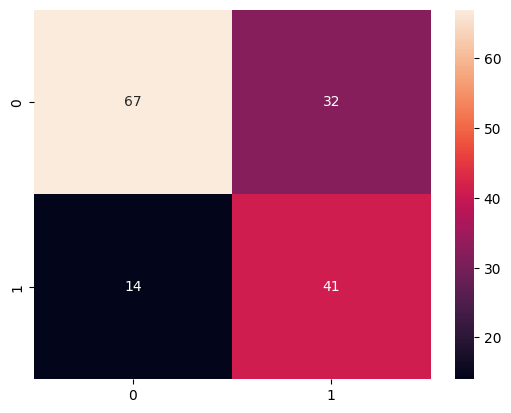

In [26]:
matriz_confusao = confusion_matrix(y_teste, y_predicao)
sns.heatmap(matriz_confusao, annot=True)

**Análise sobre a Matriz de Confusão:**
- Verdadeiro Negativo (TN): Predição correta de ausência da patologia. Há 67 mulheres que o modelo apontou como resultado negativo e era a realidade.
- Falso Negativo (FN): Predição incorreta de ausência da patologia. Há 14 mulheres em que o modelo apontou como resultado negativo para diabetes e não era a realidade. **Maior risco clínico**, pois provavelmente elas correm o risco de não ter tratamento, por não ter o diagnóstico correto.
- Verdadeiro Positivo (TP): Predição correta presença da patologia. Há 41 mulheres em que o modelo apontou como resultado positivo e 
era a realidade.
- Falso Positivo (FP): Predição incorreta presença da patologia. Há 32 mulheres em que o modelo apontou como resultado positivo e não era a realidade.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_gravidez                     768 non-null    int64  
 1   taxa_glicose                     768 non-null    int64  
 2   pressao_arterial                 768 non-null    int64  
 3   espessura_pele                   768 non-null    int64  
 4   nivel_insulina                   768 non-null    int64  
 5   imc                              768 non-null    float64
 6   funcao_hereditariedade_diabetes  768 non-null    float64
 7   idade                            768 non-null    int64  
 8   resultado                        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Interação com o modelo

- Exemplo de perfil que leva a resultado **positivo**:
    CONCLUIR BASEADO NO DF
- Exemplo de perfil que leva a resultado **negativo**:
    CONCLUIR BASEADO NO DF

## ***OLHAR PARA ESSE ALGORITMO***:
- Tratamento de exceções, caso coloque um tipo de dado errado
- Possibilidade de criar função ou classe para ajudar o processo e deixá-lo menos verboso

### Desenvolvimento de funções para tratar as features e diminuir o tamanho código

In [28]:
def tratar_feature_acessoria(variavel, df, nome_col):
    while True:
        try:
            valor_input = input(f'Digite o valor de {variavel}? Se quiser pular, aperte enter sem digitar.')
            if valor_input == '':
                media = df[nome_col].mean()
                print(f'\nUsando a média do sistema, sendo essa, aproximadamente, {media:.2f}')
                return media
            else:
                print(f'\nValor digitado: {int(valor_input)}')
                return int(valor_input)
        except OverflowError:
            print('\nValor extremamente alto.\n')
            continue
        except ValueError:
            print('\nO tipo de dado está errado. Digite letras para nome e números para as demais.\n')
            continue

def tratar_feature_obrigatoria():
    pass
                              

In [ ]:
while True:
    nome = input('\nQual o seu nome?\n')
    if nome.lower() == 'sair':
        print("\nEncerrando o sistema de predição. Até logo!\n")
        break  # Sai do loop na hora, sem perguntar o resto
    idade = int(input('\nQual a sua idade?*\n'))
    gravidez = int(input('\nQuantas vezes você já engravidou?*\n'))
    glicose = int(input('\nQual a sua taxa normal de glicose em (UNIDADE DE MEDIDA)?*\n'))
    pressao_arterial = input('\nQual a sua presão arterial em (UNIDADE DE MEDIDA)?\n')
    pressao_arterial = tratar_feature_acessoria(pressao_arterial, df, 'pressao_arterial')
    espessura_pele = input('\nQual a espessura da sua pele em (UNIDADE DE MEDIDA)?\n')
    if espessura_pele == '':
        espessura_pele = df['espessura_pele']
    nivel_insulina = int(input('\nQual o seu nível de insulina em (UNIDADE DE MEDIDA)?*\n'))
    imc = float(input('\nQual o seu IMC em (UNIDADE DE MEDIDA)?*\n'))
    hereditariedade = float(input('\nQual o seu fator de hereditariedade em (UNIDADE DE MEDIDA)?*\n'))
    
    dados_paciente = [[gravidez, glicose, pressao_arterial, espessura_pele, nivel_insulina, imc, hereditariedade, idade]]

    diagnostico = xgb_classifier.predict(dados_paciente)

    # O resultado virá em uma lista, por isso deve-se referenciar o primeiro (e único) item dessa lista.
    if diagnostico[0] == 1:
        print(f'\nOlá {nome}, o resultado do seu exame de diabetes é de ALTA PROBABILIDADE de ser POSITIVO.\n')
    else:
        print(f'\nOlá {nome}, o resultado do seu exame de diabetes é de ALTA PROBABILIDADE de ser NEGATIVO.\n')

    continuar = input('\nGostaria de repetir o processo?\n - Digite qualquer tecla para continuar.\n - Se não, precione "sair" para sair do programa.\n')
    if continuar.lower() == 'sair':
        print("\nEncerrando o sistema de predição. Até logo!\n")
        break  

In [ ]:
df.head()